In [ ]:
cd sample_data

/content/sample_data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# warnings.filterwarnings(“ignore”)

In [ ]:
data1 = pd.read_csv("applicant.csv")
data2 = pd.read_csv("loan.csv")

In [ ]:
data1.dtypes

applicant_id                                               int64
Primary_applicant_age_in_years                             int64
Gender                                                    object
Marital_status                                            object
Number_of_dependents                                       int64
Housing                                                   object
Years_at_current_residence                                 int64
Employment_status                                         object
Has_been_employed_for_at_least                            object
Has_been_employed_for_at_most                             object
Telephone                                                 object
Foreign_worker                                             int64
Savings_account_balance                                   object
Balance_in_existing_bank_account_lower_limit_of_bucket    object
Balance_in_existing_bank_account_upper_limit_of_bucket    object
dtype: object

In [ ]:
data2.dtypes

loan_application_id                            object
applicant_id                                    int64
Months_loan_taken_for                           int64
Purpose                                        object
Principal_loan_amount                           int64
EMI_rate_in_percentage_of_disposable_income     int64
Property                                       object
Has_coapplicant                                 int64
Has_guarantor                                   int64
Other_EMI_plans                                object
Number_of_existing_loans_at_this_bank           int64
Loan_history                                   object
high_risk_applicant                             int64
dtype: object

In [ ]:
data = pd.merge(data1, data2, on="applicant_id", how="right")

In [ ]:
data.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


In [ ]:
data.shape

(1000, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   applicant_id                                            1000 non-null   int64 
 1   Primary_applicant_age_in_years                          1000 non-null   int64 
 2   Gender                                                  1000 non-null   object
 3   Marital_status                                          1000 non-null   object
 4   Number_of_dependents                                    1000 non-null   int64 
 5   Housing                                                 1000 non-null   object
 6   Years_at_current_residence                              1000 non-null   int64 
 7   Employment_status                                       1000 non-null   object
 8   Has_been_employed_for_at_least                   

In [ ]:
df_new = data.copy()


In [ ]:
data['Gender'].value_counts()

male      690
female    310
Name: Gender, dtype: int64

In [ ]:
gender_dict = {'male': 1, 'female': 2, }
df_new['gender_ord'] = data['Gender'].map(gender_dict)
df_new[['gender_ord', 'Gender']].head(3)

,gender_ord,Gender
0,1,male
1,2,female
2,1,male


In [ ]:
data['Marital_status'].value_counts()

single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: Marital_status, dtype: int64

In [ ]:
Marital_status_dict = {'single': 1, 'divorced/separated/married': 2,'married/widowed': 3, 'divorced/separated': 4 }
df_new['Marital_status_ord'] = data['Marital_status'].map(Marital_status_dict)
df_new[['Marital_status_ord', 'Marital_status']].head(4)

,Marital_status_ord,Marital_status
0,1,single
1,2,divorced/separated/married
2,1,single
3,1,single


In [ ]:
data['Housing'].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

In [ ]:
Housing_dict = {'own': 1, 'rent': 2, 'for free':3 }
df_new['Housing_ord'] = data['Housing'].map(Housing_dict)
df_new[['Housing_ord', 'Housing']].head(3)

,Housing_ord,Housing
0,1,own
1,1,own
2,1,own


In [ ]:
data['Employment_status'].value_counts()

skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64

In [ ]:
Employment_status_dict = {'skilled employee / official': 1, 'unskilled - resident': 2,'management / self-employed / highly qualified employee / officer':3,'unemployed / unskilled - non-resident':4 }
df_new['Employment_status_ord'] = data['Employment_status'].map(Employment_status_dict)
df_new[['Employment_status_ord', 'Employment_status']].head(3)

,Employment_status_ord,Employment_status
0,1,skilled employee / official
1,1,skilled employee / official
2,2,unskilled - resident


In [ ]:
data['Has_been_employed_for_at_least'].value_counts()

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [ ]:
Has_been_employed_for_at_least_dict = {'1 year': 1, '7 years': 7,'4 years':4,'0 year':0 }
df_new['Has_been_employed_for_at_least_ord'] = data['Has_been_employed_for_at_least'].map(Has_been_employed_for_at_least_dict)
df_new[['Has_been_employed_for_at_least_ord', 'Has_been_employed_for_at_least']].head(3)

,Has_been_employed_for_at_least_ord,Has_been_employed_for_at_least
0,7.0,7 years
1,1.0,1 year
2,4.0,4 years


In [ ]:
data['Has_been_employed_for_at_most'].value_counts()

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

In [ ]:
Has_been_employed_for_at_most_dict = {'1 year': 1, '7 years': 7,'4 years':4,'0 year':0 }
df_new['Has_been_employed_for_at_most_ord'] = data['Has_been_employed_for_at_most'].map(Has_been_employed_for_at_most_dict)
df_new[['Has_been_employed_for_at_most_ord', 'Has_been_employed_for_at_most']].head(3)

,Has_been_employed_for_at_most_ord,Has_been_employed_for_at_most
0,NaN,NaN
1,4.0,4 years
2,7.0,7 years


In [ ]:
data['Telephone'].value_counts()

Registered under the applicant's name    404
Name: Telephone, dtype: int64

In [ ]:
Telephone_dict = {"Registered under the applicant's name": 1}
df_new['Telephone_ord'] = data['Telephone'].map(Telephone_dict)
df_new[['Telephone_ord', 'Telephone']].head(10)

,Telephone_ord,Telephone
0,1.0,Registered under the applicant's name
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,1.0,Registered under the applicant's name
6,NaN,NaN
7,1.0,Registered under the applicant's name
8,NaN,NaN
9,NaN,NaN


In [ ]:
data['Savings_account_balance'].value_counts()

Low          603
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

In [ ]:
Savings_account_balance_dict = {'Low': 1, 'Medium': 2,'High': 3, 'Very high': 4 }
df_new['Savings_account_balance_ord'] = data['Savings_account_balance'].map(Savings_account_balance_dict)
df_new[['Savings_account_balance_ord', 'Savings_account_balance']].head(3)

,Savings_account_balance_ord,Savings_account_balance
0,NaN,NaN
1,1.0,Low
2,1.0,Low


In [ ]:
data['Balance_in_existing_bank_account_lower_limit_of_bucket'].value_counts()

0        269
2 lac     63
Name: Balance_in_existing_bank_account_lower_limit_of_bucket, dtype: int64

In [ ]:
Balance_in_existing_bank_account_lower_limit_of_bucket_dict = {'0': 0, '2 lac': 2, }
df_new['Balance_in_existing_bank_account_lower_limit_of_bucket_ord'] = data['Balance_in_existing_bank_account_lower_limit_of_bucket'].map(Balance_in_existing_bank_account_lower_limit_of_bucket_dict)
df_new[['Balance_in_existing_bank_account_lower_limit_of_bucket_ord', 'Balance_in_existing_bank_account_lower_limit_of_bucket']].head(3)

,Balance_in_existing_bank_account_lower_limit_of_bucket_ord,Balance_in_existing_bank_account_lower_limit_of_bucket
0,NaN,NaN
1,0.0,0
2,NaN,NaN


In [ ]:
data['Balance_in_existing_bank_account_upper_limit_of_bucket'].value_counts()

0        274
2 lac    269
Name: Balance_in_existing_bank_account_upper_limit_of_bucket, dtype: int64

In [ ]:
Balance_in_existing_bank_account_upper_limit_of_bucket_dict = {'0': 0, '2 lac': 2, }
df_new['Balance_in_existing_bank_account_upper_limit_of_bucket_ord'] = data['Balance_in_existing_bank_account_upper_limit_of_bucket'].map(Balance_in_existing_bank_account_upper_limit_of_bucket_dict)
df_new[['Balance_in_existing_bank_account_upper_limit_of_bucket_ord', 'Balance_in_existing_bank_account_upper_limit_of_bucket']].head(3)

,Balance_in_existing_bank_account_upper_limit_of_bucket_ord,Balance_in_existing_bank_account_upper_limit_of_bucket
0,0.0,0
1,2.0,2 lac
2,NaN,NaN


In [ ]:
data['Purpose'].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [ ]:
Purpose_dict = {'electronic equipment': 1, 'new vehicle': 2,'FF&E': 3, 'used vehicle': 4,'business': 5, 'education': 6, 'repair costs': 7, 'domestic appliances': 8, 'career development': 9 }
df_new['Purpose_ord'] = data['Purpose'].map(Purpose_dict)
df_new[['Purpose_ord', 'Purpose']].head(3)

,Purpose_ord,Purpose
0,1.0,electronic equipment
1,1.0,electronic equipment
2,6.0,education


In [ ]:
data['Property'].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [ ]:
Property_dict = {'car or other': 1, 'real estate': 2, 'building society savings agreement/life insurance': 3 }
df_new['Property_ord'] = data['Property'].map(Property_dict)
df_new[['Property_ord', 'Property']].head(3)

,Property_ord,Property
0,2.0,real estate
1,2.0,real estate
2,2.0,real estate


In [ ]:
data['Other_EMI_plans'].value_counts()

bank      139
stores     47
Name: Other_EMI_plans, dtype: int64

In [ ]:
Other_EMI_plans_dict = {'bank': 1, 'stores': 2, }
df_new['Other_EMI_plans_ord'] = data['Other_EMI_plans'].map(Other_EMI_plans_dict)
df_new[['Other_EMI_plans_ord', 'Other_EMI_plans']].head(3)

,Other_EMI_plans_ord,Other_EMI_plans
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [ ]:
data['Loan_history'].value_counts()

existing loans paid back duly till now     530
critical/pending loans at other banks      293
delay in paying off loans in the past       88
all loans at this bank paid back duly       49
no loans taken/all loans paid back duly     40
Name: Loan_history, dtype: int64

In [ ]:
Loan_history_dict = {'existing loans paid back duly till now': 1, 'critical/pending loans at other banks': 2, 'delay in paying off loans in the past': 3,'all loans at this bank paid back duly': 4,'all loans at this bank paid back duly': 5,'no loans taken/all loans paid back duly': 6}
df_new['Loan_history_ord'] = data['Loan_history'].map(Loan_history_dict)
df_new[['Loan_history_ord', 'Loan_history']].head(3)

,Loan_history_ord,Loan_history
0,2,critical/pending loans at other banks
1,1,existing loans paid back duly till now
2,2,critical/pending loans at other banks


In [ ]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
data['Gender'].value_counts()

male      690
female    310
Name: Gender, dtype: int64

In [ ]:
data['Number_of_dependents'].value_counts()

1    845
2    155
Name: Number_of_dependents, dtype: int64

In [ ]:
data['EMI_rate_in_percentage_of_disposable_income'].value_counts()

4    476
2    231
3    157
1    136
Name: EMI_rate_in_percentage_of_disposable_income, dtype: int64

In [ ]:
data['Employment_status'].value_counts()

skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64

In [ ]:
data['Months_loan_taken_for'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Months_loan_taken_for, dtype: int64

most of the loans are taken for 12,18,24 months

high risk application with employment status

In [ ]:
data[data['high_risk_applicant'] == 1]['Employment_status'].groupby(data['Employment_status']).count().sort_values(ascending=False)

Employment_status
skilled employee / official                                         186
unskilled - resident                                                 56
management / self-employed / highly qualified employee / officer     51
unemployed / unskilled - non-resident                                 7
Name: Employment_status, dtype: int64

**Answews for section 2.**

1. Features provided for predicting the risk of replaying the loan are good, they are having low level of correlation among them. Thats means you have a good amout of feature to the task. But in data there are some missing values too which need to be carefully deal.

2. I did not feel to derive a new feature so i did not do it.

3. There are some feature like:
 "Has_been_employed_for_at_least",
 "Has_been_employed_for_at_most",
 "Telephone", "Savings_account_balance", "Balance_in_existing_bank_account_lower_limit_of_bucket", "Balance_in_existing_bank_account_upper_limit_of_bucket", "Purpose", "Property", "Other_EMI_plans"
 These feature are having some missing values in them, so i have categorize them according to the amount of missing values they have so there is low missing values, medium missing values, high missing values features.
 I have takle them differently.
 a). Low missing values feature: In this feature like "Purpose" and "Has_been_employed_for_at_least", The missing values are replaced by the value which was having high frequency in that feature.
 b). We can perform the clustering and classification to predict the missing value in these feature but in this experiment i dropped that feature.
 c). High missing values feature: I simply dropped them out because if those feature if given any value the will cause class imbalance which leads to bad predictions.

4. To handle categorical feature: i have encoded it into a numerical value by making a dictionary where category assigned as "key" and numeric value as "value".

5 & 6. I have performed the correlation between the features of data and found low level of co-relation (maximum 0.4 magnitue of correlation i could find) so i have decided to take use of all feature except applicat_id, loan_application_id and the feature having higher missing values.

7. I am planning to use SVM, random forest and logistic regressor for this binary classification task.

8,9 & 10. I have used confusion matrix and other classication performance measures like recall, precision, roc_auc_score and f1_score which in given in this notebook.
I just gave a hit and try method for hyper parameter tuning if time and permits a could do "Grid Search" to find best hyperparamters for tuning the model in a search space.

11. I like to deploy it by making a web application using flask on a server which will take feature's value as an input and display a response stating that "The applicant having High risk of repaying the loan" or "The applicant low risk of repaying loan".




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   applicant_id                                                1000 non-null   int64  
 1   Primary_applicant_age_in_years                              1000 non-null   int64  
 2   Gender                                                      1000 non-null   object 
 3   Marital_status                                              1000 non-null   object 
 4   Number_of_dependents                                        1000 non-null   int64  
 5   Housing                                                     1000 non-null   object 
 6   Years_at_current_residence                                  1000 non-null   int64  
 7   Employment_status                                           1000 non-null   object 
 8  

In [ ]:
dataset = df_new[["applicant_id","Primary_applicant_age_in_years","gender_ord","Marital_status_ord","Number_of_dependents","Housing_ord","Years_at_current_residence", "Employment_status_ord","Has_been_employed_for_at_least_ord", "Has_been_employed_for_at_most_ord","Telephone_ord","Foreign_worker","Savings_account_balance_ord","Balance_in_existing_bank_account_lower_limit_of_bucket_ord","Balance_in_existing_bank_account_upper_limit_of_bucket_ord","loan_application_id","Months_loan_taken_for", "Purpose_ord","Principal_loan_amount","EMI_rate_in_percentage_of_disposable_income", "Property_ord","Has_coapplicant","Has_guarantor","Other_EMI_plans_ord","Number_of_existing_loans_at_this_bank","Loan_history_ord", "high_risk_applicant"]]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   applicant_id                                                1000 non-null   int64  
 1   Primary_applicant_age_in_years                              1000 non-null   int64  
 2   gender_ord                                                  1000 non-null   int64  
 3   Marital_status_ord                                          1000 non-null   int64  
 4   Number_of_dependents                                        1000 non-null   int64  
 5   Housing_ord                                                 1000 non-null   int64  
 6   Years_at_current_residence                                  1000 non-null   int64  
 7   Employment_status_ord                                       1000 non-null   int64  
 8  

In [ ]:
# saving the dataframe
dataset.to_csv('dataset.csv', header=True, index=False)


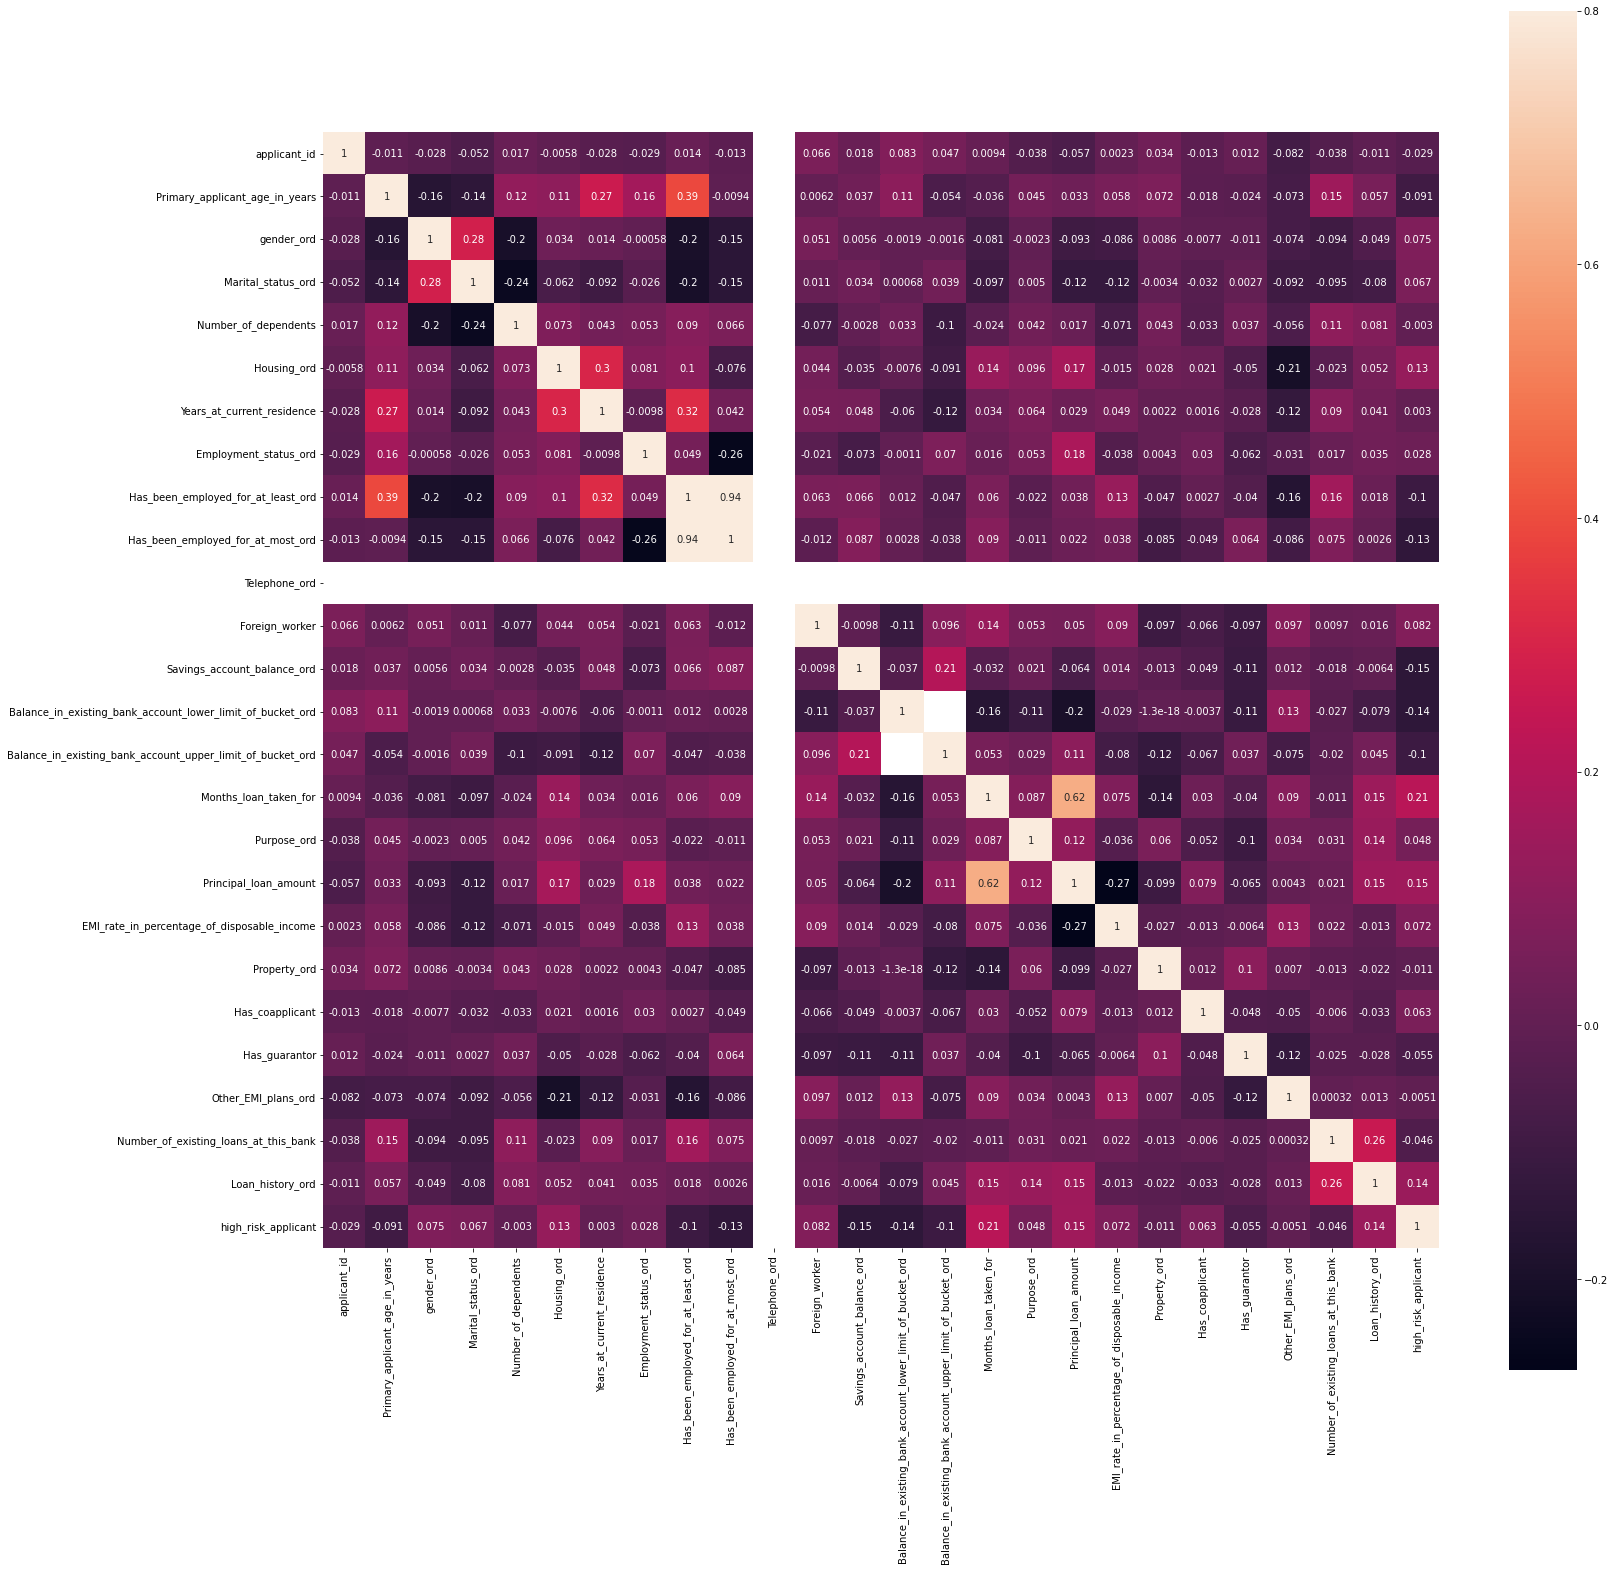

In [ ]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(matrix,vmax=.8,square=True,cmap=None, annot = True)

In [ ]:
cd sample_data

/content/sample_data


In [ ]:
dataset = pd.read_csv("dataset.csv")

In [ ]:
dataset.isnull().sum()

applicant_id                                                    0
Primary_applicant_age_in_years                                  0
gender_ord                                                      0
Marital_status_ord                                              0
Number_of_dependents                                            0
Housing_ord                                                     0
Years_at_current_residence                                      0
Employment_status_ord                                           0
Has_been_employed_for_at_least_ord                             62
Has_been_employed_for_at_most_ord                             253
Telephone_ord                                                 596
Foreign_worker                                                  0
Savings_account_balance_ord                                   183
Balance_in_existing_bank_account_lower_limit_of_bucket_ord    668
Balance_in_existing_bank_account_upper_limit_of_bucket_ord    457
loan_appli

In [ ]:
Has_been_employed_for_at_most_ord, Telephone_ord, Savings_account_balance_ord, Balance_in_existing_bank_account_lower_limit_of_bucket_ord, Balance_in_existing_bank_account_upper_limit_of_bucket_ord,Other_EMI_plans_ord

In [ ]:
Savings_account_balance_ord,Property_ord

In [ ]:
dataset = dataset[["Primary_applicant_age_in_years","gender_ord","Marital_status_ord","Number_of_dependents","Housing_ord","Years_at_current_residence", "Employment_status_ord","Has_been_employed_for_at_least_ord","Foreign_worker","Months_loan_taken_for", "Purpose_ord","Principal_loan_amount","EMI_rate_in_percentage_of_disposable_income","Has_coapplicant","Has_guarantor","Number_of_existing_loans_at_this_bank","Loan_history_ord", "high_risk_applicant"]]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   int64  
 1   gender_ord                                   1000 non-null   int64  
 2   Marital_status_ord                           1000 non-null   int64  
 3   Number_of_dependents                         1000 non-null   int64  
 4   Housing_ord                                  1000 non-null   int64  
 5   Years_at_current_residence                   1000 non-null   int64  
 6   Employment_status_ord                        1000 non-null   int64  
 7   Has_been_employed_for_at_least_ord           938 non-null    float64
 8   Foreign_worker                               1000 non-null   int64  
 9   Months_loan_taken_for                        1000 non-null   int64  
 10  P

In [ ]:
dataset['Has_been_employed_for_at_least_ord'].fillna(dataset['Has_been_employed_for_at_least_ord'].mode()[0], inplace=True)

In [ ]:
dataset['Purpose_ord'].fillna(dataset['Purpose_ord'].mode()[0], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   int64  
 1   gender_ord                                   1000 non-null   int64  
 2   Marital_status_ord                           1000 non-null   int64  
 3   Number_of_dependents                         1000 non-null   int64  
 4   Housing_ord                                  1000 non-null   int64  
 5   Years_at_current_residence                   1000 non-null   int64  
 6   Employment_status_ord                        1000 non-null   int64  
 7   Has_been_employed_for_at_least_ord           1000 non-null   float64
 8   Foreign_worker                               1000 non-null   int64  
 9   Months_loan_taken_for                        1000 non-null   int64  
 10  P

In [ ]:
X = dataset.iloc[:, 0:-1]
Y = dataset.iloc[:, -1]
X=X.iloc[:,1:]
X

,gender_ord,Marital_status_ord,Number_of_dependents,Housing_ord,Years_at_current_residence,Employment_status_ord,Has_been_employed_for_at_least_ord,Foreign_worker,Months_loan_taken_for,Purpose_ord,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history_ord
0,1,1,1,1,4,1,7.0,1,6,1.0,1169000,4,0,0,2,2
1,2,2,1,1,2,1,1.0,1,48,1.0,5951000,2,0,0,1,1
2,1,1,2,1,3,2,4.0,1,12,6.0,2096000,2,0,0,1,2
3,1,1,2,3,4,1,4.0,1,42,3.0,7882000,2,0,1,1,1
4,1,1,2,3,4,1,1.0,1,24,2.0,4870000,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,1,1,4,2,4.0,1,12,3.0,1736000,3,0,0,1,1
996,1,4,1,1,4,3,1.0,1,30,4.0,3857000,4,0,0,1,1
997,1,1,1,1,4,1,7.0,1,12,1.0,804000,4,0,0,1,1
998,1,1,1,3,4,1,1.0,1,45,1.0,1845000,4,0,0,1,1


In [ ]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: high_risk_applicant, Length: 1000, dtype: int64

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split



# model1 = MLPRegressor(hidden_layer_sizes=(8,8,8,8,8,8,8,8), max_iter=5000)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

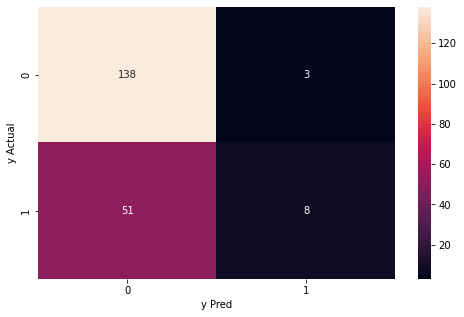

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Pred')
plt.ylabel('y Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       141
           1       0.73      0.14      0.23        59

    accuracy                           0.73       200
   macro avg       0.73      0.56      0.53       200
weighted avg       0.73      0.73      0.66       200



In [ ]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                    precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                     f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,73.000000
recall,13.559322
precision,72.727273
roc_auc_score,55.715831
f1_score,22.857143


Logistic regression

In [ ]:
# fitting model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

#prediksi
y_pred = model_LR.predict(X_test)

In [ ]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                    precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                     f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,74.500000
recall,28.813559
precision,65.384615
roc_auc_score,61.215290
f1_score,40.000000


Random Forest

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)

In [ ]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                    precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                     f1_score(y_test, y_pred)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,72.000000
recall,28.813559
precision,54.838710
roc_auc_score,59.442241
f1_score,37.777778
